In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn.model_selection import GridSearchCV

In [75]:
train = pd.read_csv("../data/train.csv")
predict = pd.read_csv("../data/predict.csv")

In [76]:
train_c = pd.read_csv("../data/train_c")
predict_c = pd.read_csv("../data/predict_c")

In [77]:
train_c.drop(["Unnamed: 0"], axis=1, inplace=True)
predict_c.drop(["Unnamed: 0"], axis=1, inplace=True)

# Model 2 - Logictic Regression

70% train

In [78]:
X = train_c.drop(columns=["price"])
y = train_c["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [6]:
model_lr = LogisticRegression()

In [7]:
#model_lr.fit(X_train, y_train)

In [8]:
#y_pred = model_lr.predict(X_test)

- Metrics

In [ ]:
acc = accuracy_score(y_pred, y_test)
print(f"Accuracy score = {acc}")
print("-"*35)

prec = precision_score(y_pred, y_test, average="weighted")
print(f"Precision score = {prec}")
print("-"*35)

rec = recall_score(y_pred, y_test, average="weighted")
print(f"Recall score = {rec}")
print("-"*35)

f1 = f1_score(y_pred, y_test, average="weighted")
print(f"F1 score = {f1}")

## To deliver

In [ ]:
y_pred_predict_test = model_lr.predict(predict_c)

In [ ]:
y_pred_predict_test

In [ ]:
predict_c["price"] = y_pred_predict_test
predict_c.head()

In [ ]:
sub_2 = predict_c[["id","price"]]
sub_2

In [ ]:
sub_2 = sub_2.set_index("id")
sub_2

#### Exporting prediction # 2

In [ ]:
sub_2.to_csv("../predictions/1.2")

# Model 3 - RandomForestRegressor

#### Non-linear model

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

- warm_start=True --> Reuse solutions from previous call to fit and add more estimators to the ensemble

In [119]:
regr = RandomForestRegressor(n_estimators=1000, warm_start=True, random_state=0)

In [120]:
regr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=0, warm_start=True)

In [121]:
y_pred = regr.predict(X_test)

- Metrics

In [122]:
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error = {mae}')
print("-"*35)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error = {mse}')
print("-"*35)

rmse = mean_squared_error(y_test, y_pred)**0.5
print(f'Root Mean Squared Error = {rmse}')

Mean Absolute Error = 280.1348930910888
-----------------------------------
Mean Squared Error = 294182.12350952096
-----------------------------------
Root Mean Squared Error = 542.3855856395162


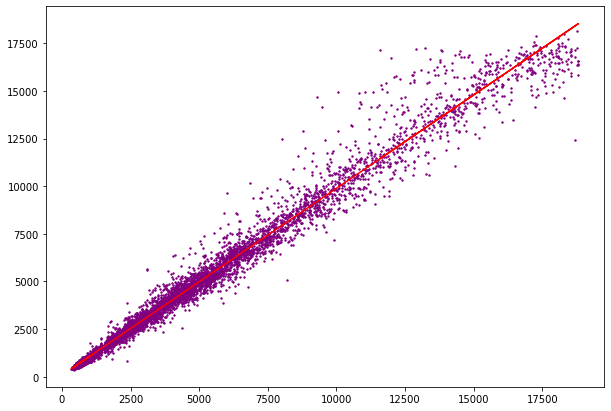

In [126]:
plt.figure(figsize=(10,7))

plt.scatter(y_test,y_pred, s=2, color = "purple")

m, b = np.polyfit(y_test,y_pred, 1)
plt.plot(y_test, m*y_test + b, color = "red");

## To deliver

In [21]:
y_pred_predict_test = regr.predict(predict_c)

In [22]:
y_pred_predict_test

array([ 908.322, 6731.502,  712.28 , ...,  927.934,  659.049, 4380.282])

In [23]:
predict_c["price"] = y_pred_predict_test
predict_c.head()

,id,carat,cut,color,clarity,depth,table,price
0,0,0.45,4,2,3,62.8,58.0,908.322
1,1,1.23,5,5,3,61.0,56.0,6731.502
2,2,0.33,5,6,8,61.8,55.0,712.280
3,3,0.51,4,1,4,58.0,60.0,1836.916
4,4,0.40,4,2,4,62.2,59.0,939.773


In [26]:
sub_3 = predict_c[["id", "price"]]
sub_3

,id,price
0,0,908.322
1,1,6731.502
2,2,712.280
3,3,1836.916
4,4,939.773
...,...,...
13480,13480,402.858
13481,13481,4364.787
13482,13482,927.934
13483,13483,659.049


In [27]:
sub_3 = sub_3.set_index("id")
sub_3

,price
id,
0,908.322
1,6731.502
2,712.280
3,1836.916
4,939.773
...,...
13480,402.858
13481,4364.787
13482,927.934


In [28]:
sub_3.to_csv("../predictions/1.3")

# RandomForestRegressor using GridSearchCV

#### Looping through predefined hyperparameters to fit the model on my training set (GOAL: to select the best parameters from the listed hyperparameters)

In [84]:
regr_grid = RandomForestRegressor()

In [85]:
param_grid = {
'n_estimators': [600,700,1000,1200],
 'min_samples_split': [2,3,4],
 'min_samples_leaf': [1,2,3,4],
 'max_depth': [None],
'warm_start': [False]
            }

In [86]:
mse_scorer = make_scorer(mean_squared_error)

In [87]:
grid_search = GridSearchCV(estimator=regr_grid, param_grid=param_grid, cv=2, verbose=2, scoring=mse_scorer)

- Display hyperparameters

In [ ]:
#grid_search.fit(X_train, y_train)

In [82]:
#grid_search.best_params_

- Evaluate performance

In [ ]:
best_grid = grid_search.best_estimator_

In [ ]:
grid_accuracy = evaluate(best_grid, y_test, y_pred)

#### Observation:
This model didn't work out since the fit was taking too long to execute, and therefore, I wasn't able to find the best hyperparameters and evaluate the performance (wether the model improved or not)

# Model 4 - DecissionTreeClassifier

In [115]:
tree = DecisionTreeClassifier(max_depth=3)

In [116]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

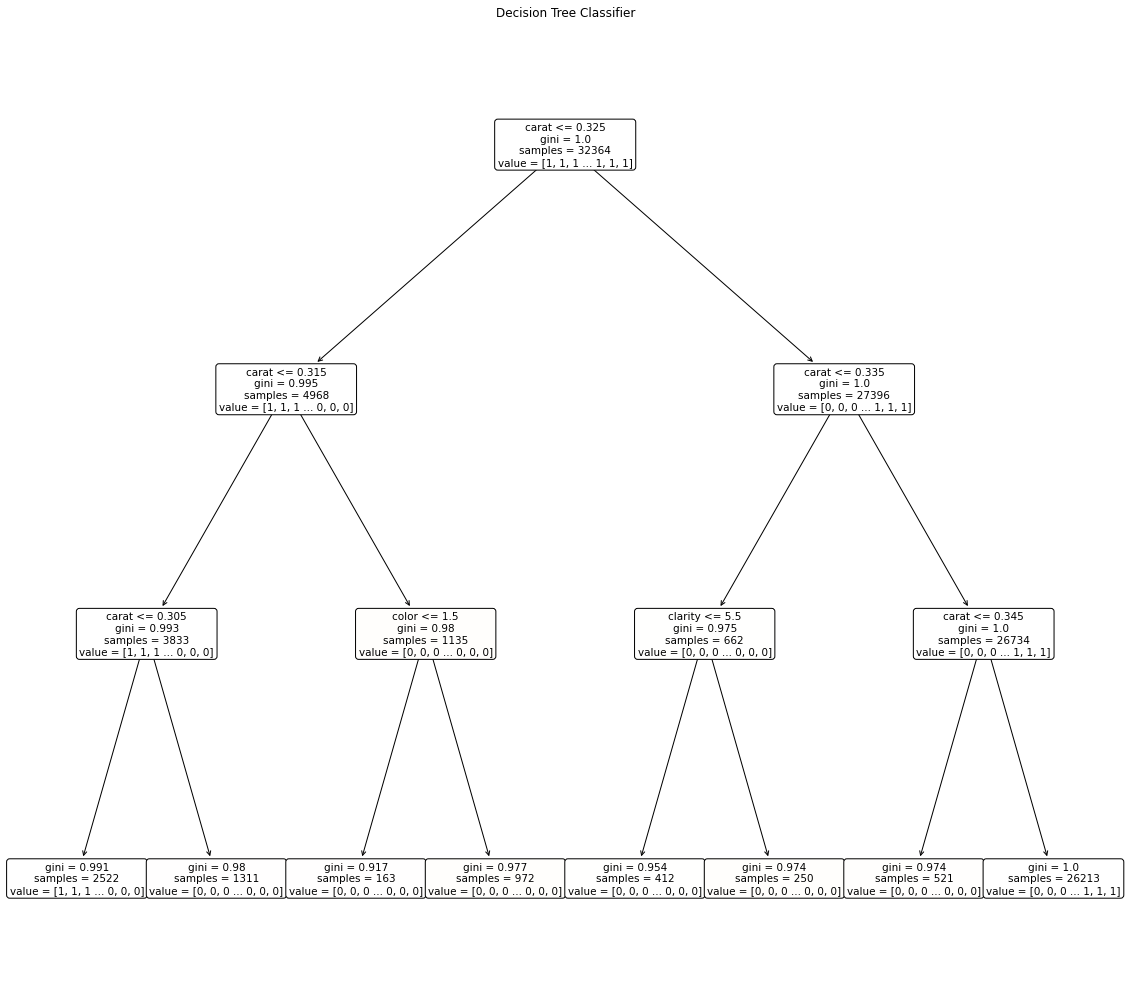

In [113]:
plt.figure(figsize=(20,18))
plot_tree(tree, feature_names=X_train.columns, filled=True, rounded=True)
plt.title("Decision Tree Classifier");

In [91]:
y_pred = tree.predict(X_test)

In [92]:
acc = accuracy_score(y_pred, y_test)
print(f"Accuracy score = {acc}")
print("-"*35)

prec = precision_score(y_pred, y_test, average="weighted")
print(f"Precision score = {prec}")
print("-"*35)

rec = recall_score(y_pred, y_test, average="weighted")
print(f"Recall score = {rec}")
print("-"*35)

f1 = f1_score(y_pred, y_test, average="weighted")
print(f"F1 score = {f1}")

Accuracy score = 0.009763935236682734
-----------------------------------
Precision score = 0.9068403768040793
-----------------------------------
Recall score = 0.009763935236682734
-----------------------------------
F1 score = 0.018246787480919582


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## To deliver

In [65]:
predict_c

,id,carat,cut,color,clarity,depth,table
0,0,0.45,4,2,3,62.8,58.0
1,1,1.23,5,5,3,61.0,56.0
2,2,0.33,5,6,8,61.8,55.0
3,3,0.51,4,1,4,58.0,60.0
4,4,0.40,4,2,4,62.2,59.0
...,...,...,...,...,...,...,...
13480,13480,0.30,3,6,3,62.2,57.0
13481,13481,1.01,5,7,4,62.3,55.0
13482,13482,0.33,5,3,7,61.9,55.0
13483,13483,0.30,4,4,4,59.3,59.0


In [66]:
y_pred_tree = tree.predict(predict_c)

In [67]:
y_pred_tree

array([ 827,  827, 1114, ..., 1114,  776,  827])

In [68]:
predict_c["price"] = y_pred_tree
predict_c.head()

,id,carat,cut,color,clarity,depth,table,price
0,0,0.45,4,2,3,62.8,58.0,827
1,1,1.23,5,5,3,61.0,56.0,827
2,2,0.33,5,6,8,61.8,55.0,1114
3,3,0.51,4,1,4,58.0,60.0,827
4,4,0.40,4,2,4,62.2,59.0,827


In [71]:
sub_4 = predict_c[["id", "price"]]
sub_4

,id,price
0,0,827
1,1,827
2,2,1114
3,3,827
4,4,827
...,...,...
13480,13480,776
13481,13481,827
13482,13482,1114
13483,13483,776


In [72]:
sub_4 = sub_4.set_index("id")
sub_4

,price
id,
0,827
1,827
2,1114
3,827
4,827
...,...
13480,776
13481,827
13482,1114


In [73]:
sub_4.to_csv("../predictions/1.4")